# EDA

In [2]:
import pandas as pd
import os
from IPython.display import display

In [16]:
data_directory = '/Users/jessiefreelander/Flatiron/Git_lab_Phase Project/Phase-4-Project/Phase-4-Project/Twitter Data Sets/'

dataframes = []

for filename in os.listdir(data_directory):
    if filename.endswith('.csv'): 
        file_path = os.path.join(data_directory, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)


combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.head(10)

,username,tweet_text,tweet_raw,date,happy,angry,surprise,sad,fear,afinn,bing,sid,bertweet,bertweet_confidence,coins,exchanges
0,ShardiB2,sol probably see a trend shift to green here ...,$SOLProbably see a trend shift to green here soon,02/09/2024,0.00,0.00,0.00,0.00,1.00,0.0,0.0,0.0000,0.0,0.908659,NaN,NaN
1,vinsolana,mmm good job samoyedcoin i like what youre doi...,Mmm good job @samoyedcoin i like what you’re d...,02/09/2024,0.00,0.00,0.00,0.00,1.00,5.0,2.0,0.6597,1.0,0.986673,NaN,NaN
2,cryptophrex,sol profits most likely to flow into inj,$SOL profits most likely to flow into $INJ,12/29/2023,0.00,0.00,0.00,0.00,1.00,0.0,0.0,0.4404,0.0,0.944062,NaN,NaN
3,claytopians_NFT,providing value is key being clear about the ...,Providing value is key & being clear about the...,02/09/2024,0.00,0.05,0.15,0.30,0.50,4.0,1.0,0.8771,0.0,0.905987,NaN,NaN
4,Solmaxxi,sol is pushing for 110 remember anon this mag...,$SOL is pushing for $110.Remember anon this ma...,02/09/2024,0.38,0.12,0.38,0.00,0.12,0.0,1.0,-0.7105,0.0,0.627812,NaN,NaN
5,sharkdad81,pdex project is stronger than uni cake and inc...,$PDEX project is stronger than $UNI $CAKE and ...,02/09/2024,0.00,0.00,0.00,1.00,0.00,2.0,2.0,0.3818,1.0,0.988513,NaN,NaN
6,web3moe,to celebrate 59k followers heres a big giveawa...,To celebrate 59k+ followers here’s a big givea...,02/09/2024,0.00,0.17,0.33,0.00,0.50,5.0,2.0,0.7906,1.0,0.937607,NaN,NaN
7,yientulips,the squad cappysnft,the squad @CappysNFT,02/09/2024,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0000,0.0,0.935295,NaN,NaN
8,gr3gor14n,获得一等奖 eventspolkadotnetwork 虫洞w的空投的地址包括但不限以下...,🥰获得一等奖 - events-polkadot.network虫洞$W的空投的地址，包括但...,02/09/2024,0.00,0.00,0.00,0.00,0.00,0.0,1.0,0.0000,0.0,0.975767,NaN,NaN
9,HeteroChupalaaa,went to leh bank the other day they gave me mo...,Went to $LEH bank the other day. They gave me ...,02/09/2024,0.22,0.00,0.00,0.33,0.44,7.0,2.0,0.8176,1.0,0.988199,NaN,NaN


In [17]:
combined_df = combined_df.drop(columns=['coins', 'exchanges', 'tweet_text'])
combined_df = combined_df.dropna()

In [18]:

if 'tweet_raw' in combined_df.columns:

    combined_df['three_upper_count'] = combined_df['tweet_raw'].str.count(r'[A-Z]{3}')
    

    combined_df['four_upper_count'] = combined_df['tweet_raw'].str.count(r'[A-Z]{4}')
    

    three_upper_counts = combined_df['three_upper_count'].value_counts().sort_index()
    

    four_upper_counts = combined_df['four_upper_count'].value_counts().sort_index()


    print("Count of Three Consecutive Uppercase Letters and Their Frequencies:")
    for count, frequency in three_upper_counts.items():
        print(f"Count: {count}, Frequency: {frequency}")

s
    print("\nCount of Four Consecutive Uppercase Letters and Their Frequencies:")
    for count, frequency in four_upper_counts.items():
        print(f"Count: {count}, Frequency: {frequency}")
else:
    print("The 'tweet_text' column does not exist in the combined DataFrame.")

Count of Three Consecutive Uppercase Letters and Their Frequencies:
Count: 0, Frequency: 25495
Count: 1, Frequency: 9315
Count: 2, Frequency: 5791
Count: 3, Frequency: 4355
Count: 4, Frequency: 2504
Count: 5, Frequency: 1761
Count: 6, Frequency: 1292
Count: 7, Frequency: 1012
Count: 8, Frequency: 891
Count: 9, Frequency: 533
Count: 10, Frequency: 555
Count: 11, Frequency: 421
Count: 12, Frequency: 361
Count: 13, Frequency: 218
Count: 14, Frequency: 229
Count: 15, Frequency: 196
Count: 16, Frequency: 184
Count: 17, Frequency: 207
Count: 18, Frequency: 214
Count: 19, Frequency: 235
Count: 20, Frequency: 174
Count: 21, Frequency: 156
Count: 22, Frequency: 186
Count: 23, Frequency: 177
Count: 24, Frequency: 155
Count: 25, Frequency: 150
Count: 26, Frequency: 142
Count: 27, Frequency: 119
Count: 28, Frequency: 114
Count: 29, Frequency: 252
Count: 30, Frequency: 207
Count: 31, Frequency: 146
Count: 32, Frequency: 84
Count: 33, Frequency: 89
Count: 34, Frequency: 81
Count: 35, Frequency: 195


In [19]:

new_df = combined_df[['tweet_raw', 'three_upper_count']].copy() 
new_df['Token'] = new_df['three_upper_count']


print("New DataFrame with 'Token' column:")
print(new_df.head())

New DataFrame with 'Token' column:
                                           tweet_raw  three_upper_count  Token
0  $SOLProbably see a trend shift to green here soon                  1      1
1  Mmm good job @samoyedcoin i like what you’re d...                  0      0
2         $SOL profits most likely to flow into $INJ                  2      2
3  Providing value is key & being clear about the...                  5      5
4  $SOL is pushing for $110.Remember anon this ma...                  2      2


In [20]:

new_df['consecutive_upper'] = new_df['tweet_raw'].str.extractall(r'([A-Z]{3})')[0].groupby(level=0).agg(lambda x: ' '.join(x)).reindex(new_df.index, fill_value='')


print("New DataFrame with 'consecutive_upper' column:")
print(new_df.head())

New DataFrame with 'consecutive_upper' column:
                                           tweet_raw  three_upper_count  \
0  $SOLProbably see a trend shift to green here soon                  1   
1  Mmm good job @samoyedcoin i like what you’re d...                  0   
2         $SOL profits most likely to flow into $INJ                  2   
3  Providing value is key & being clear about the...                  5   
4  $SOL is pushing for $110.Remember anon this ma...                  2   

   Token    consecutive_upper  
0      1                  SOL  
1      0                       
2      2              SOL INJ  
3      5  BAY NFT ALL FBX NFT  
4      2              SOL BTC  


In [1]:

view_df = new_df[['tweet_raw', 'three_upper_count', 'Token', 'consecutive_upper']]

print("Nice DataFrame View:")
display(view_df)

NameError: name 'new_df' is not defined

In [22]:

three_letter_counts = new_df['consecutive_upper'].str.split(expand=True).stack().value_counts()

three_letter_counts_df = three_letter_counts.reset_index()
three_letter_counts_df.columns = ['Three_Letters', 'Count']

print("Count of each three-letter combination:")
display(three_letter_counts_df)

Count of each three-letter combination:


,Three_Letters,Count
0,NFT,5244
1,USD,5154
2,BTC,4982
3,XRP,4705
4,ETH,4436
...,...,...
6454,DCO,1
6455,PYM,1
6456,UAN,1
6457,NYK,1


In [23]:
merged_df = pd.read_csv('/Users/jessiefreelander/Flatiron/Git_lab_Phase Project/Phase-4-Project/merged_data.csv')

merged_df

,username,tweet_raw,date,happy,angry,surprise,sad,fear,afinn,bing,sid,bertweet,bertweet_confidence,price
0,ShardiB2,$SOLProbably see a trend shift to green here soon,02/09/2024,0.00,0.00,0.00,0.00,1.00,0.0,0.0,0.0000,0.0,0.908659,46730.526874
1,vinsolana,Mmm good job @samoyedcoin i like what you’re d...,02/09/2024,0.00,0.00,0.00,0.00,1.00,5.0,2.0,0.6597,1.0,0.986673,46730.526874
2,claytopians_NFT,Providing value is key & being clear about the...,02/09/2024,0.00,0.05,0.15,0.30,0.50,4.0,1.0,0.8771,0.0,0.905987,46730.526874
3,Solmaxxi,$SOL is pushing for $110.Remember anon this ma...,02/09/2024,0.38,0.12,0.38,0.00,0.12,0.0,1.0,-0.7105,0.0,0.627812,46730.526874
4,sharkdad81,$PDEX project is stronger than $UNI $CAKE and ...,02/09/2024,0.00,0.00,0.00,1.00,0.00,2.0,2.0,0.3818,1.0,0.988513,46730.526874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57006,BrantfordTrue,@Wealthsimple do you guys have any comments to...,12/08/2023,0.14,0.00,0.14,0.14,0.57,4.0,2.0,0.7906,0.0,0.716348,43637.834210
57007,makoto_ch_,#Bitcoin recovery incoming...Are you ready?,12/17/2023,1.00,0.00,0.00,0.00,0.00,0.0,2.0,0.3612,1.0,0.544448,41925.141137
57008,Minhcrypto203,Avowed has hand casted spells as well as wands...,12/17/2023,0.00,0.00,0.80,0.00,0.20,-1.0,2.0,-0.1280,0.0,0.828905,41925.141137
57009,tommyinnit,She needs to declare for the @NBA draft then c...,12/17/2023,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0000,0.0,0.955351,41925.141137


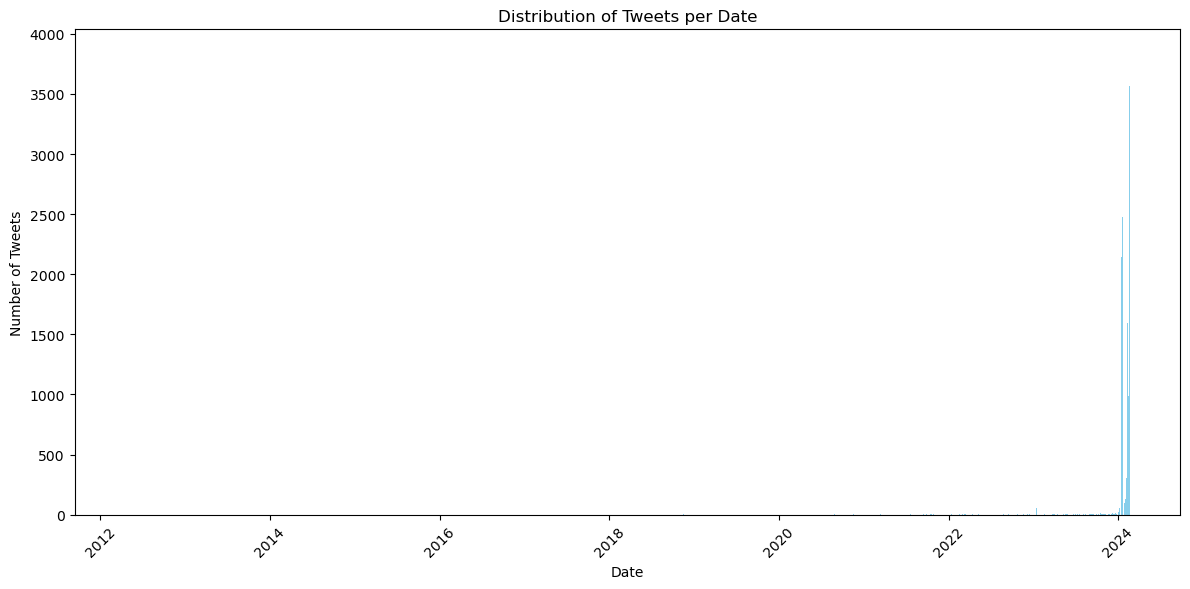

In [24]:

import matplotlib.pyplot as plt


combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')


daily_tweet_counts = combined_df.groupby(combined_df['date'].dt.date).size().reset_index(name='tweet_count')


plt.figure(figsize=(12, 6))
plt.bar(daily_tweet_counts['date'], daily_tweet_counts['tweet_count'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweets per Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()